In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

utils.font_setting()

In [2]:
# Hyperparameter
sampling_type = 0
seed = 10
n_obs = 2
Vmax_list = [i+0.5 for i in [1, 2, 3, 4, 5]]
theta_FOV_list = [i*np.pi/180 for i in [5, 10, 30, 60]]
theta_img_list = [np.pi/180*10**i for i in [
    -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0]]
k_list = [2.0**i for i in [-1.0, -0.5, 0.0, 0.5, 1.0]]
# system
log_dir = './log/subgraph_monte/'


In [3]:
data = []
for Vmax in Vmax_list:
    for theta_FOV in theta_FOV_list:
        for theta_img in theta_img_list:
            for k in k_list:
                fname = f'stats_{n_obs}_{seed}_{Vmax}_{theta_FOV*180/np.pi}_{theta_img*180/np.pi}_{k}_{sampling_type}'
                df = pd.read_csv(log_dir + fname + '.csv', index_col=0)
                #
                matching_num = (df['matching_num']*df['weight']).mean()
                multiple = (df['multiple']*df['weight']).mean()
                unique = (df['unique']*df['weight']).mean()
                noexist = (df['noexist']*df['weight']).mean()
                included = (df['included']*df['weight']).mean()
                data.append([
                    Vmax, theta_FOV, theta_img, k,
                    matching_num, multiple, unique, noexist, included])
data = np.array(data)

In [ ]:
for Vmax in Vmax_list:
    for theta_FOV in theta_FOV_list:
        scale = 3
        fig = plt.figure(figsize=(scale*1.6, scale))
        ax = fig.add_subplot(1, 1, 1)

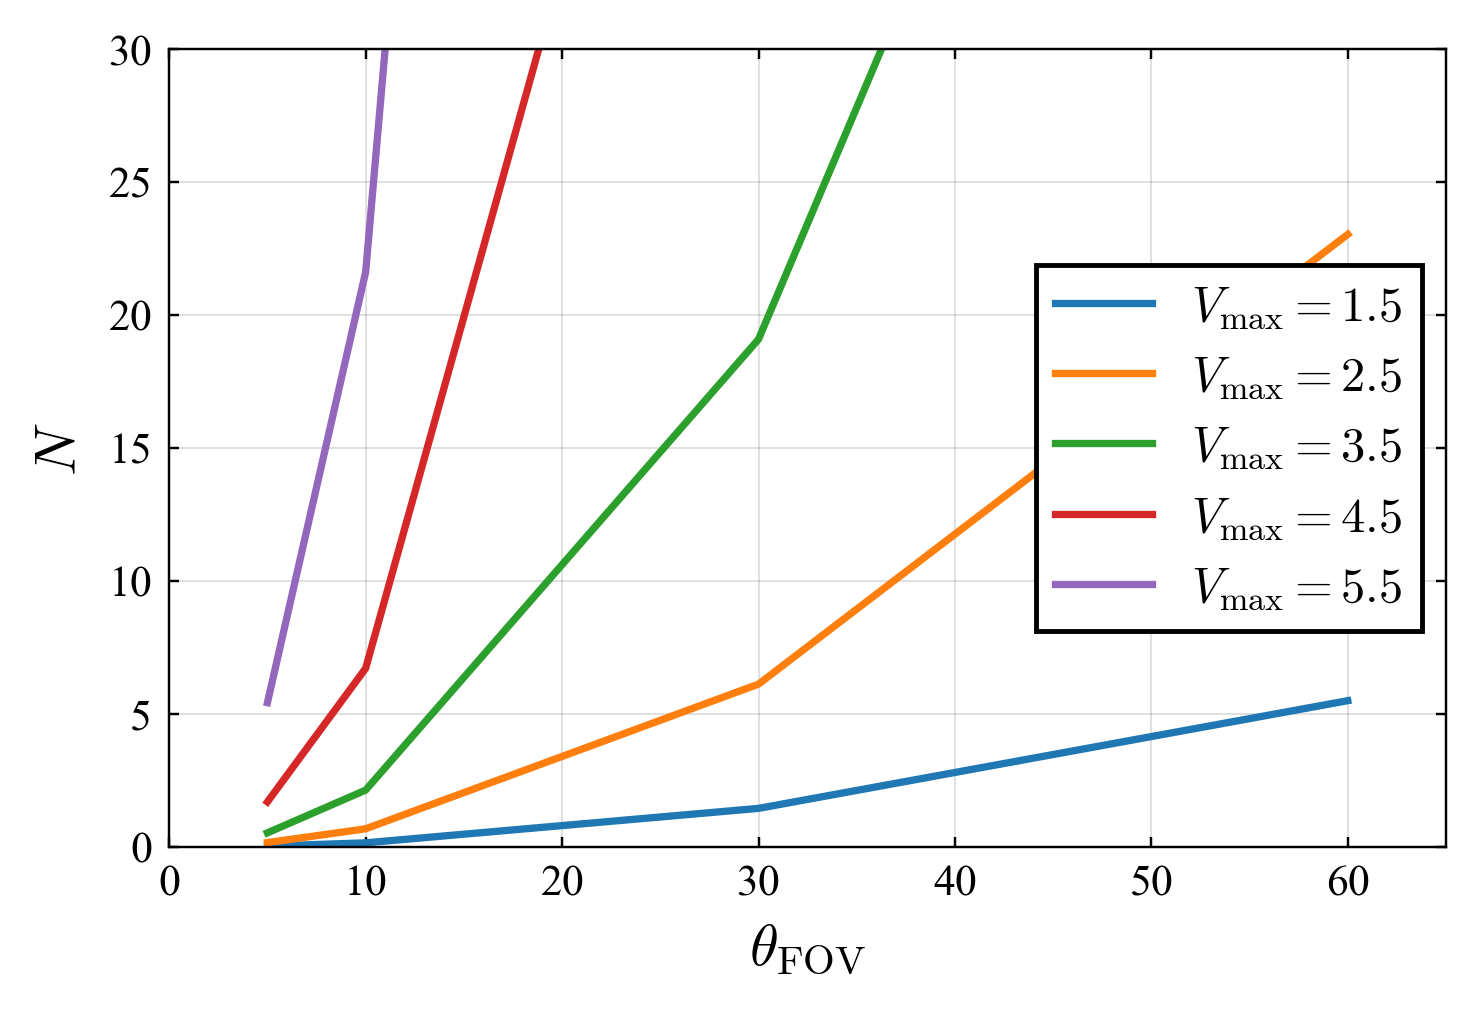

In [4]:
scale = 3
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1)
# 
Vmav15 = data[data[:, 0] == 1.5]
Vmav25 = data[data[:, 0] == 2.5]
Vmav35 = data[data[:, 0] == 3.5]
Vmav45 = data[data[:, 0] == 4.5]
Vmav55 = data[data[:, 0] == 5.5]
# 
ax.plot(Vmav15[:, 1]*180/np.pi, Vmav15[:, 2], label='$V_{\mathrm{max}} = 1.5$')
ax.plot(Vmav25[:, 1]*180/np.pi, Vmav25[:, 2], label='$V_{\mathrm{max}} = 2.5$')
ax.plot(Vmav35[:, 1]*180/np.pi, Vmav35[:, 2], label='$V_{\mathrm{max}} = 3.5$')
ax.plot(Vmav45[:, 1]*180/np.pi, Vmav45[:, 2], label='$V_{\mathrm{max}} = 4.5$')
ax.plot(Vmav55[:, 1]*180/np.pi, Vmav55[:, 2], label='$V_{\mathrm{max}} = 5.5$')
# 
ax.set_xlabel('$\\theta_{\mathrm{FOV}}$')
ax.set_ylabel('$N$')
ax.set_ylim(0, 30)
ax.set_xlim(0, 65)
ax.legend()

In [6]:
Vmav5

array([[1.5       , 0.08726646, 0.0444    , 0.22810928],
       [2.5       , 0.08726646, 0.1785    , 0.45766658],
       [3.5       , 0.08726646, 0.5438    , 0.84032861],
       [4.5       , 0.08726646, 1.7084    , 1.61177828],
       [5.5       , 0.08726646, 5.4379    , 3.49973833]])

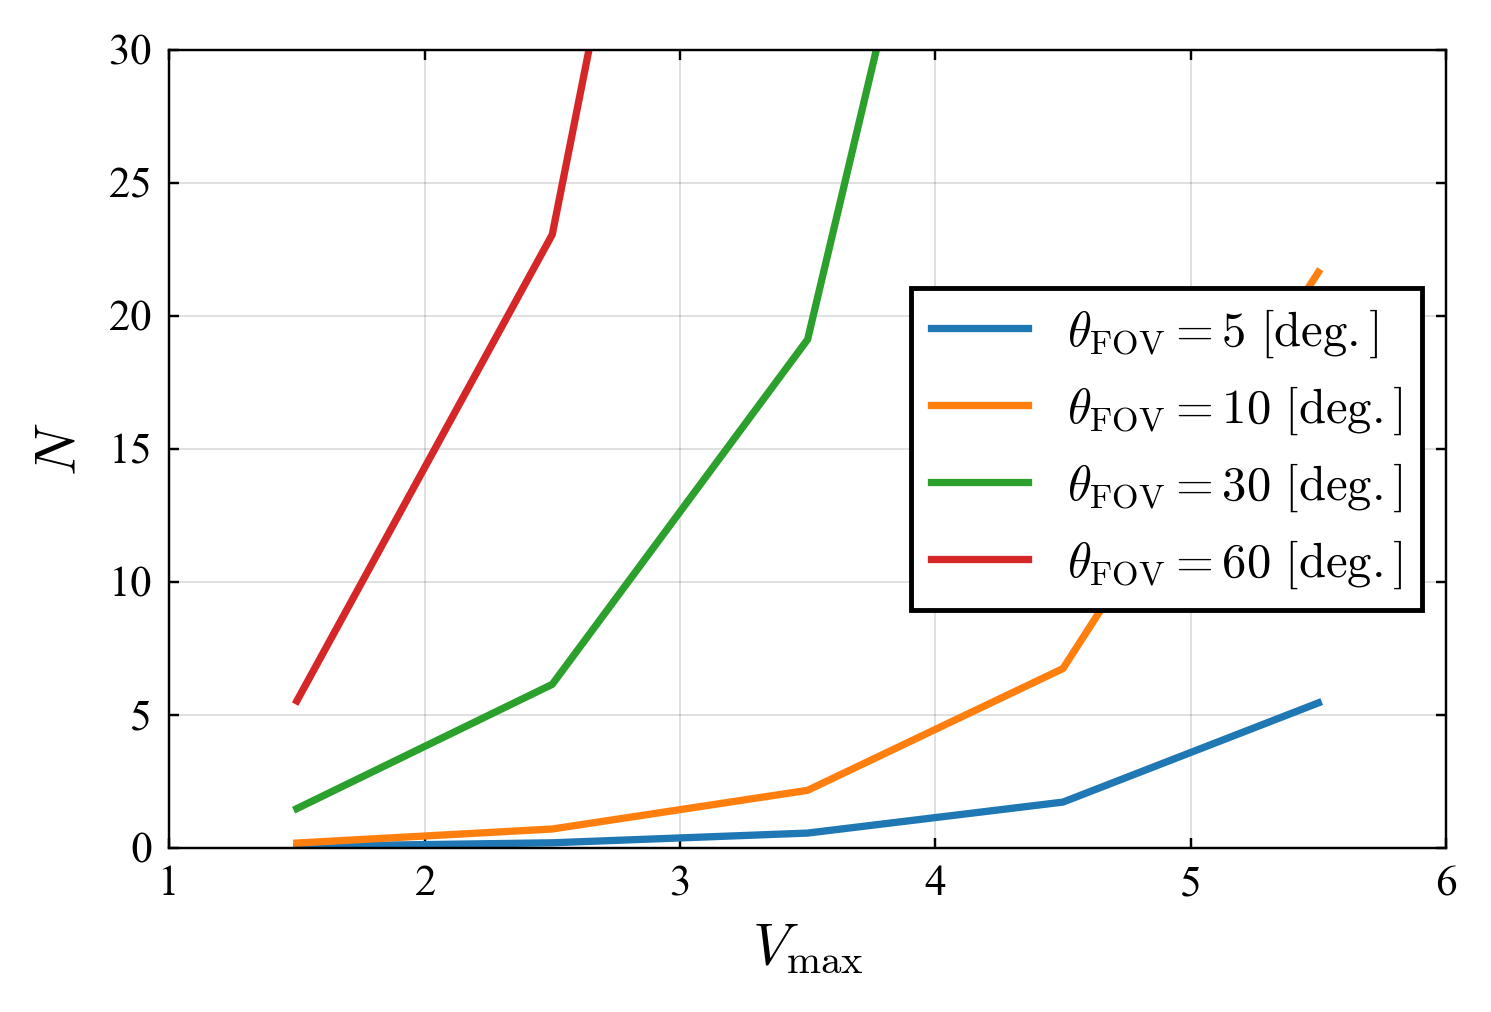

In [12]:
scale = 3
fig = plt.figure(figsize=(scale*1.6, scale))
ax = fig.add_subplot(1, 1, 1)
# 
Vmav5 = data[data[:, 1] == 5*np.pi/180]
Vmav10 = data[data[:, 1] == 10*np.pi/180]
Vmav30 = data[data[:, 1] == 30*np.pi/180]
Vmav60 = data[data[:, 1] == 60*np.pi/180]
# 
ax.plot(Vmav5[:, 0], Vmav5[:, 2], label='$\\theta_{\mathrm{FOV}} = 5 \ \mathrm{[deg.]}$')
ax.plot(Vmav10[:, 0], Vmav10[:, 2], label='$\\theta_{\mathrm{FOV}} = 10 \ \mathrm{[deg.]}$')
ax.plot(Vmav30[:, 0], Vmav30[:, 2], label='$\\theta_{\mathrm{FOV}} = 30 \ \mathrm{[deg.]}$')
ax.plot(Vmav60[:, 0], Vmav60[:, 2], label='$\\theta_{\mathrm{FOV}} = 60 \ \mathrm{[deg.]}$')
# 
ax.set_xlabel('$V_{\mathrm{max}}$')
ax.set_ylabel('$N$')
ax.set_ylim(0, 30)
ax.set_xlim(1, 6)
ax.legend()